<a href="https://colab.research.google.com/github/jenimathew2001/DISTILLATION/blob/main/GIT_DISTILLATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **IMPORT LIBRARIES**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.metrics import mean_squared_error

import sys
from sklearn import svm
from mpl_toolkits.mplot3d import axes3d, Axes3D

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data
from sklearn.linear_model import Ridge

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

import tensorflow as tf
from tensorflow import keras
import datetime
from datetime import timezone
import pytz

# **PREPROCESSING**

In [ ]:
dataset = pd.read_excel('/content/drive/MyDrive/Data/Distillation Column Dataset (1).xlsx')

In [ ]:
dataset.columns

Index(['Time', 'Sensor1', 'Sensor2', 'Sensor3', 'Sensor4', 'Sensor5',
       'Sensor6', 'Sensor7', 'Sensor8', 'Sensor9', 'Sensor10', 'Sensor11',
       'Sensor12', 'Sensor13', 'Sensor14', 'Sensor15', 'Sensor16',
       'MoleFractionTX', 'MoleFractionHX'],
      dtype='object')

In [ ]:
dataset.shape

(961, 19)

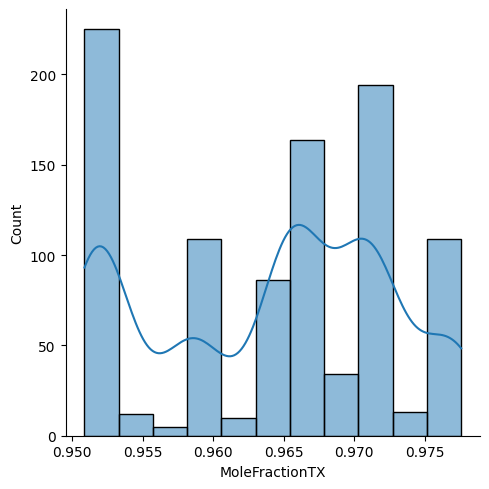

In [ ]:
sns.displot(dataset['MoleFractionTX'],kde=True)

power transform not much effect
no na values

In [ ]:
#Sensor16 - duties summary , sensor9,sensor10- constant throughout the process
columns_to_remove = ['Sensor16','Sensor9','Sensor10']
dataset = dataset.drop(columns=columns_to_remove)

<Axes: >

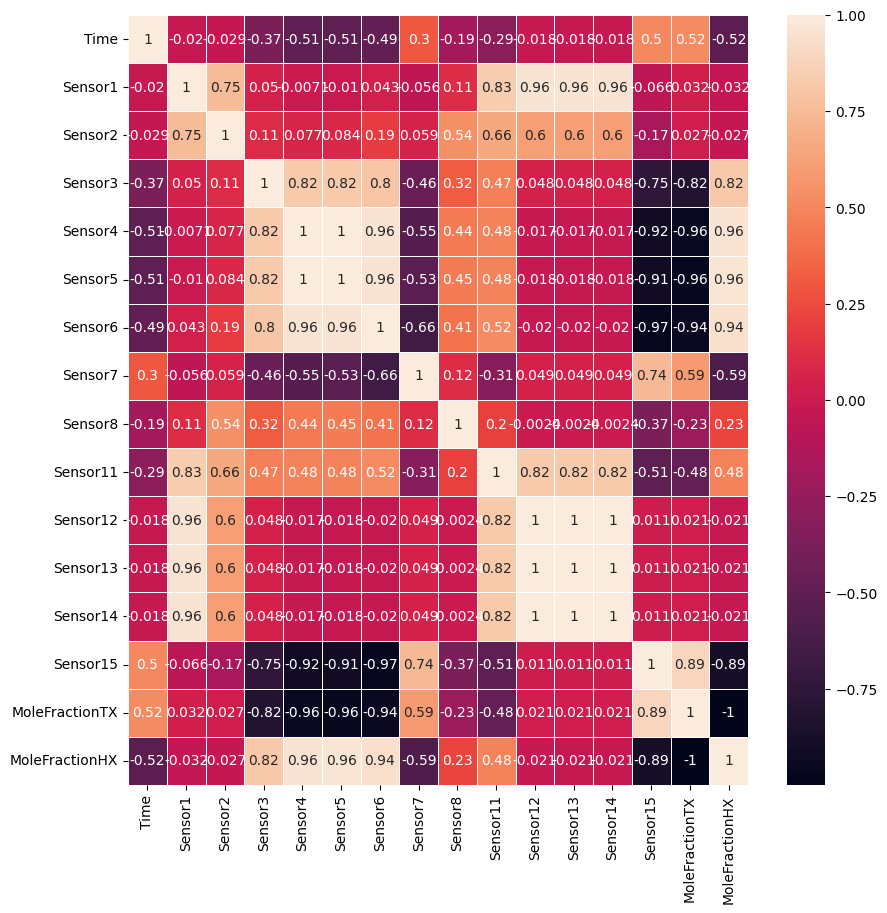

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True , linewidths=.5, ax=ax)

In [ ]:
#Remove y values
x_data = dataset.drop(['MoleFractionTX', 'MoleFractionHX'], axis=1)

#Calculate the correlation matrix
corr_matrix = x_data.corr().abs()  # Use .abs() to consider absolute values for correlations

#Identify highly correlated variables (threshold, e.g., > 0.8)
threshold = 0.8
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [ ]:
highly_correlated_features = []

# Iterate over the upper triangle of the correlation matrix
for row in range(upper_tri.shape[0]):
    for col in range(row + 1, upper_tri.shape[1]):
        if upper_tri.iloc[row, col] > threshold:
            # If the correlation coefficient exceeds the threshold, add the pair to the list
            row_col_pair = (upper_tri.index[row], upper_tri.columns[col], upper_tri.iloc[row, col])
            highly_correlated_features.append(row_col_pair)

# Convert the list of tuples into a DataFrame for better readability
highly_correlated_df = pd.DataFrame(highly_correlated_features, columns=['Feature 1', 'Feature 2', 'Correlation Coefficient'])

print(highly_correlated_df)

   Feature 1 Feature 2  Correlation Coefficient
0    Sensor1  Sensor11                 0.833498
1    Sensor1  Sensor12                 0.958142
2    Sensor1  Sensor13                 0.958142
3    Sensor1  Sensor14                 0.958142
4    Sensor3   Sensor4                 0.822167
5    Sensor3   Sensor5                 0.823246
6    Sensor4   Sensor5                 0.998642
7    Sensor4   Sensor6                 0.959892
8    Sensor4  Sensor15                 0.916069
9    Sensor5   Sensor6                 0.959797
10   Sensor5  Sensor15                 0.911593
11   Sensor6  Sensor15                 0.969132
12  Sensor11  Sensor12                 0.824889
13  Sensor11  Sensor13                 0.824889
14  Sensor11  Sensor14                 0.824889
15  Sensor12  Sensor13                 1.000000
16  Sensor12  Sensor14                 1.000000
17  Sensor13  Sensor14                 1.000000


Sensor11 , Sensor5 , Sensor2 , Sensor14

Input : Sensor5 , Sensor2 , Sensor11/Sensor14

Mass Flow Rate in Feed Flow , Condenser Pressure , Top Tower Pressure

In [ ]:
x_data_1 = dataset[['Sensor14' , 'Sensor4' , 'Sensor2']]

<Axes: >

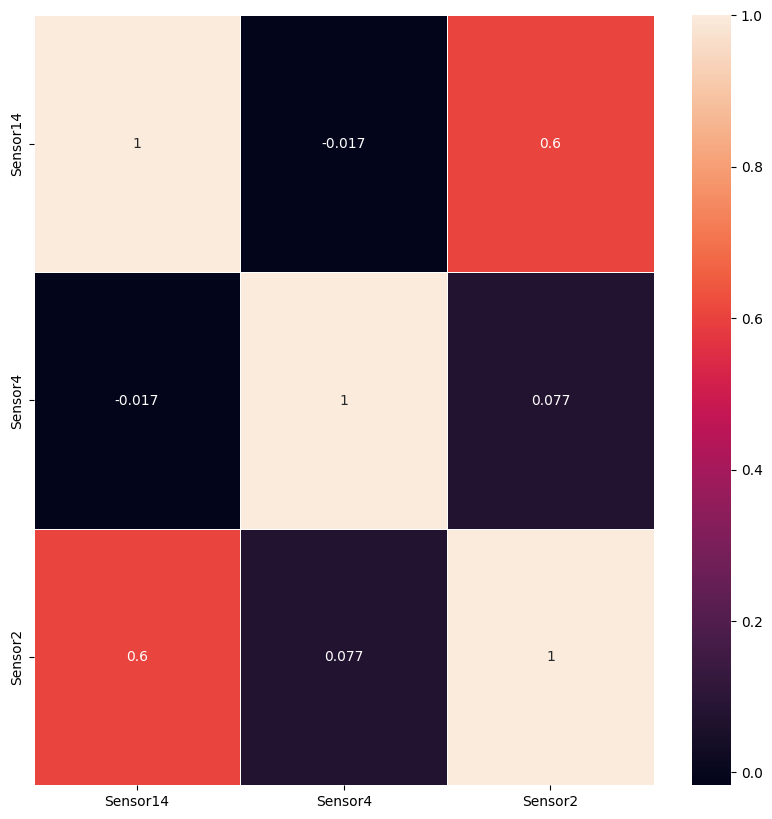

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(x_data_1.corr(),annot=True , linewidths=.5, ax=ax)

Input : ['Sensor5', 'Sensor11', 'Sensor2', 'Sensor14'] , Output : MoleFractionTX

In [ ]:
y_data = dataset[['MoleFractionTX']]

In [ ]:
y_data

,MoleFractionTX
0,0.966281
1,0.965788
2,0.965758
3,0.965756
4,0.965784
...,...
956,0.964851
957,0.964852
958,0.964853
959,0.964853


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
X_standardized = scaler.fit_transform(x_data_1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y_data, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': np.logspace(-3, 3, 7),  # Example range, from 0.001 to 1000
    'epsilon': np.logspace(-4, 0, 5),  # Example range, from 0.0001 to 1
    'kernel': ['rbf'],  # Assuming you want to stick with RBF kernel; add others if needed
}

svr = SVR()

# Setup the grid search with cross-validation
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid,
                           scoring='neg_mean_squared_error',  # Example scoring, can be adjusted
                           cv=5,  # Example of 5-fold cross-validation
                           verbose=1,  # Prints out the progress
                           n_jobs=-1)  # Use all available cores

# Fit the grid search model
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 35 candidates, totalling 175 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'epsilon': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                         'kernel': ['rbf']},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# Print the best parameters and the corresponding score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score (neg_mean_squared_error): {grid_search.best_score_}")

# Retrieve the best model
best_model = grid_search.best_estimator_

Best parameters: {'C': 0.01, 'epsilon': 0.0001, 'kernel': 'rbf'}
Best score (neg_mean_squared_error): -3.845414170709118e-06


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predicting the test set results
svm_y_pred = best_model.predict(X_test)

# Calculating the performance metrics
mse = mean_squared_error(y_test, svm_y_pred)
rmse = mean_squared_error(y_test, svm_y_pred, squared=False) # squared=False returns RMSE
mae = mean_absolute_error(y_test, svm_y_pred)
r2 = r2_score(y_test, svm_y_pred)

# Printing the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 3.6374668000893723e-06
Root Mean Squared Error (RMSE): 0.0019072144085260504
Mean Absolute Error (MAE): 0.0006716582421407535
R-squared (R²): 0.9471163363211379


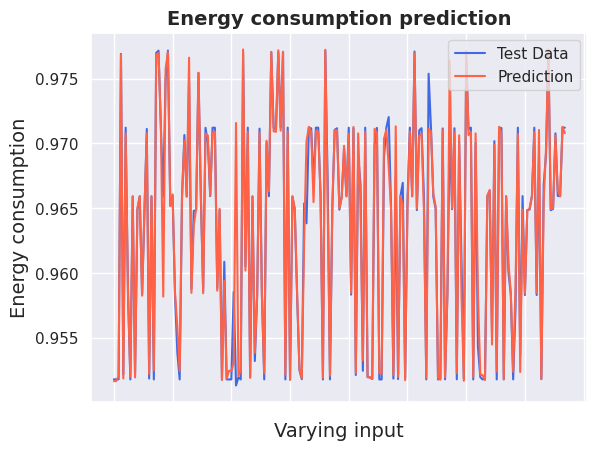

In [ ]:
y_pred = np.reshape(svm_y_pred, (-1, 1))
plt.figure()
originals = pd.DataFrame(y_test).reset_index(drop=True)  # Reset index and ensure changes are saved
predictions = pd.DataFrame(y_pred).reset_index(drop=True)

sns.set(rc={'figure.figsize':(11.7+2,8.27+2)})

ax = sns.lineplot(x=originals.index, y=originals.iloc[:, 0], label="Test Data", color='royalblue')
ax = sns.lineplot(x=predictions.index, y=predictions.iloc[:, 0], label="Prediction", color='tomato')

ax.set_title('Energy consumption prediction', size = 14, fontweight='bold')
ax.set_xlabel("Varying input", size = 14)
ax.set_ylabel("Energy consumption", size = 14)
ax.set_xticklabels('', size=10)
plt.show()
print('\n\n')

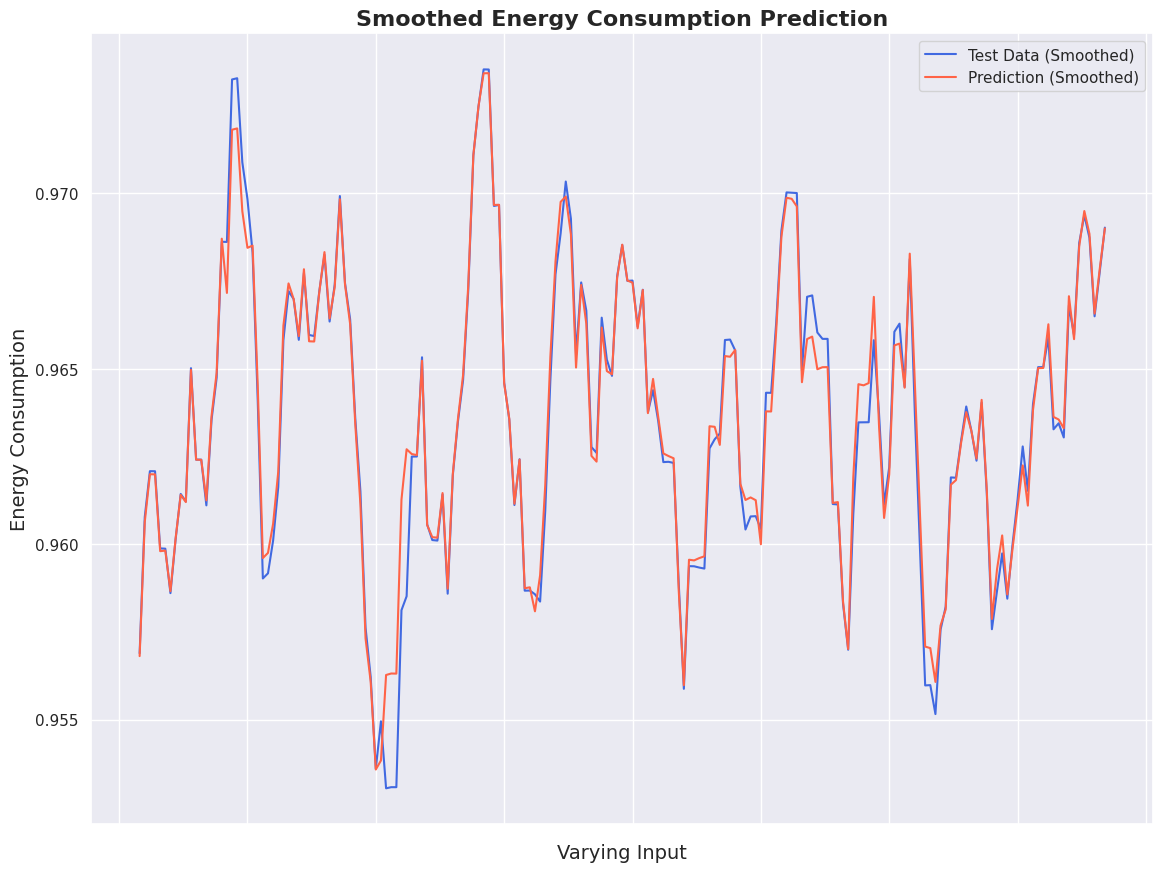

In [ ]:
# Assuming svm_y_pred and y_test are defined earlier in your code

y_pred = np.reshape(svm_y_pred, (-1, 1))
plt.figure()

# Convert to DataFrame
originals = pd.DataFrame(y_test).reset_index(drop=True)
predictions = pd.DataFrame(y_pred).reset_index(drop=True)

# Applying a simple moving average
rolling_window_size = 5  # Adjust this value as needed for your specific dataset
originals_smoothed = originals.rolling(window=rolling_window_size).mean()
predictions_smoothed = predictions.rolling(window=rolling_window_size).mean()

# Increase figure size for better visibility
sns.set(rc={'figure.figsize':(14,10)})

# Plotting
ax = sns.lineplot(x=originals_smoothed.index, y=originals_smoothed.iloc[:, 0], label="Test Data (Smoothed)", color='royalblue')
ax = sns.lineplot(x=predictions_smoothed.index, y=predictions_smoothed.iloc[:, 0], label="Prediction (Smoothed)", color='tomato')

# Enhancing the title and labels
ax.set_title('Smoothed Energy Consumption Prediction', size=16, fontweight='bold')
ax.set_xlabel("Varying Input", size=14)
ax.set_ylabel("Energy Consumption", size=14)
ax.set_xticklabels('', size=10)  # Adjust or remove this if you want to show x-axis labels

plt.legend()
plt.show()